In [2]:
in_features = 1000

In [32]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # 인코더 정의
        self.encoder = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=200),
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 50),  # 예를 들어, 입력 길이가 100인 1D 데이터를 12차원으로 압축
            nn.ReLU()
        )
        # 디코더 정의
        self.decoder = nn.Sequential(
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, 200),
            nn.ReLU(),
            nn.Linear(200, in_features),  # 압축된 표현을 다시 원본 차원으로 복원
            nn.Sigmoid()  # 데이터가 0과 1 사이의 값을 가진다고 가정
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [36]:
aa = LoadCsvToList("m_2.csv","data\\")
pulse_data = []
for j in range(1000):
    pulse_data_tmp = []
    for i in range(in_features):
        pulse_data_tmp.append(aa[j*100+i]*0.0014)
    pulse_data.append(pulse_data_tmp)

In [37]:
pulse_data = torch.tensor(pulse_data, dtype=torch.float32)
# 데이터셋과 데이터로더 준비
dataset = TensorDataset(pulse_data, pulse_data)  # 오토인코더는 입력을 타겟으로 사용
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [39]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 20
for epoch in range(epochs):
    for data in dataloader:
        inputs, targets = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 0.05090678483247757
Epoch 2, Loss: 0.04389052093029022
Epoch 3, Loss: 0.039471011608839035
Epoch 4, Loss: 0.043062467128038406
Epoch 5, Loss: 0.04358040913939476
Epoch 6, Loss: 0.03673221915960312
Epoch 7, Loss: 0.030811501666903496
Epoch 8, Loss: 0.03498273342847824
Epoch 9, Loss: 0.04495251178741455
Epoch 10, Loss: 0.04209219291806221
Epoch 11, Loss: 0.028728274628520012
Epoch 12, Loss: 0.03016909770667553
Epoch 13, Loss: 0.032256461679935455
Epoch 14, Loss: 0.028378646820783615
Epoch 15, Loss: 0.040149588137865067
Epoch 16, Loss: 0.03166769817471504
Epoch 17, Loss: 0.024599621072411537
Epoch 18, Loss: 0.037860650569200516
Epoch 19, Loss: 0.035763587802648544
Epoch 20, Loss: 0.03283337876200676


In [40]:
model.eval()  # 모델을 평가 모드로 설정


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=1000, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=25, bias=True)
    (3): ReLU()
    (4): Linear(in_features=25, out_features=12, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=12, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=1000, bias=True)
    (5): Sigmoid()
  )
)

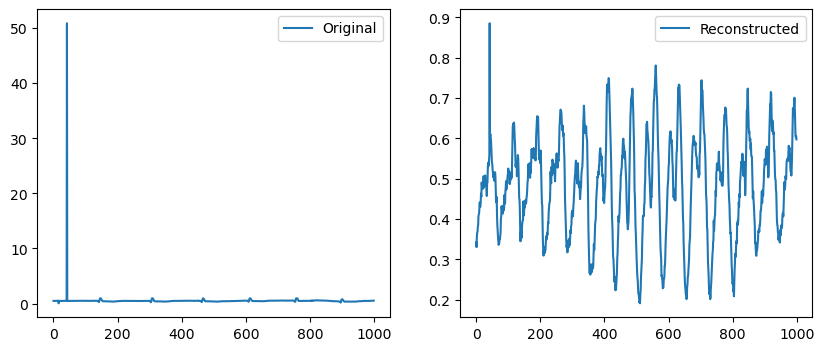

In [41]:
with torch.no_grad():  # 기울기 계산을 비활성화
    # 테스트 데이터셋에서 샘플을 하나 가져옵니다.
    test_sample = pulse_data[0:1]  # 예제를 위해 첫 번째 샘플을 사용
    reconstructed = model(test_sample)  # 모델을 통해 샘플을 복원합니다.

    # 원본 데이터와 복원된 데이터를 시각화합니다.
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 4))
    
    # 원본 데이터 시각화
    plt.subplot(1, 2, 1)
    plt.plot(test_sample[0].numpy(), label='Original')
    plt.legend()
    
    # 복원된 데이터 시각화
    plt.subplot(1, 2, 2)
    plt.plot(reconstructed[0].numpy(), label='Reconstructed')
    plt.legend()
    
    plt.show()


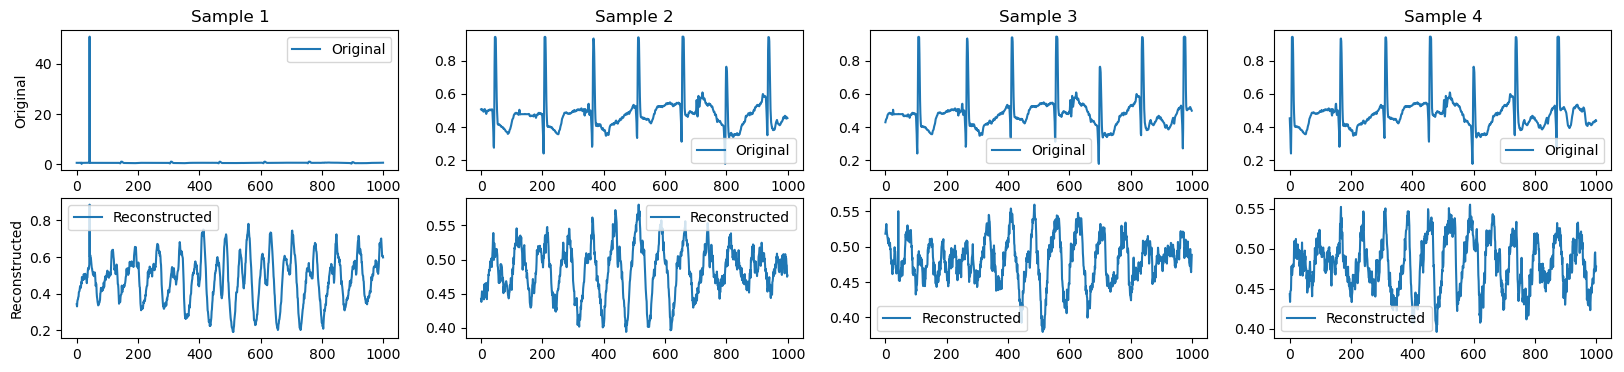

In [43]:
# 모델 평가 모드 설정
model.eval()

# 시각화를 위한 샘플 선택 (예를 들어 첫 4개 샘플)
samples_to_display = 4

# 샘플 데이터 준비
test_samples = pulse_data[:samples_to_display]  # 여기서 pulse_data는 예제 데이터입니다.
with torch.no_grad():
    # 모델을 통해 샘플 복원
    reconstructed_samples = model(test_samples)

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=samples_to_display, figsize=(20, 4))

for i in range(samples_to_display):
    # 원본 데이터 시각화
    axes[0, i].plot(test_samples[i].numpy(), label='Original')
    axes[0, i].set_title(f'Sample {i+1}')
    if i == 0:
        axes[0, i].set_ylabel('Original')
    axes[0, i].legend()
    
    # 복원된 데이터 시각화
    axes[1, i].plot(reconstructed_samples[i].numpy(), label='Reconstructed')
    if i == 0:
        axes[1, i].set_ylabel('Reconstructed')
    axes[1, i].legend()

plt.show()


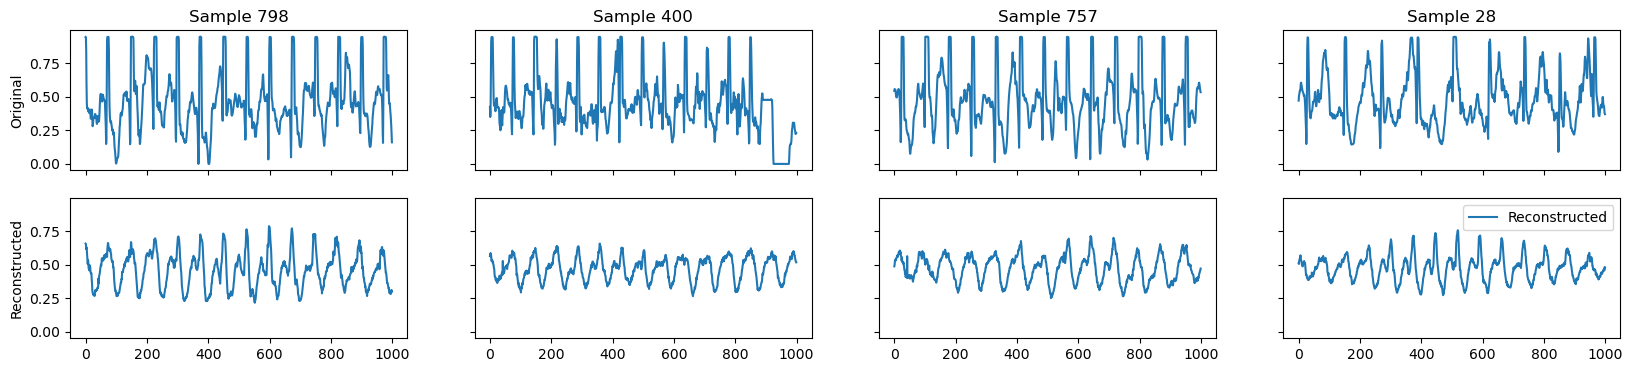

In [48]:
import torch
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt

# 모델을 평가 모드로 설정
model.eval()

# 데이터셋에서 랜덤으로 4개의 인덱스 선택
num_samples = 4
random_indices = np.random.choice(len(pulse_data), num_samples, replace=False)

# 선택된 샘플로 Subset 생성
random_subset = Subset(pulse_data, random_indices)
# Subset을 DataLoader에 로드 (배치 크기는 선택된 샘플 수와 동일하게 설정)
random_loader = DataLoader(random_subset, batch_size=num_samples)

# DataLoader에서 데이터 배치를 가져옴
for batch in random_loader:
    test_samples = batch  # 예제에서는 pulse_data가 텐서라고 가정
    break  # 한 배치만 필요

with torch.no_grad():
    # 모델을 통해 샘플 복원
    reconstructed_samples = model(test_samples)

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=num_samples, figsize=(20, 4), sharex=True, sharey=True)

for i in range(num_samples):
    # 원본 데이터 시각화
    axes[0, i].plot(test_samples[i].numpy(), label='Original')
    axes[0, i].set_title(f'Sample {random_indices[i]+1}')
    
    # 복원된 데이터 시각화
    axes[1, i].plot(reconstructed_samples[i].numpy(), label='Reconstructed')

axes[0, 0].set_ylabel('Original')
axes[1, 0].set_ylabel('Reconstructed')

plt.legend()
plt.show()


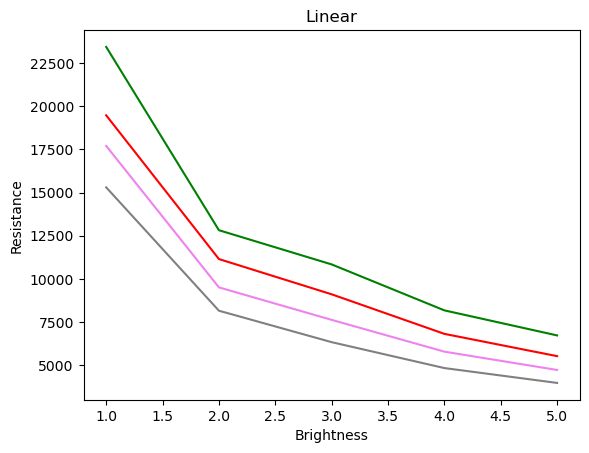

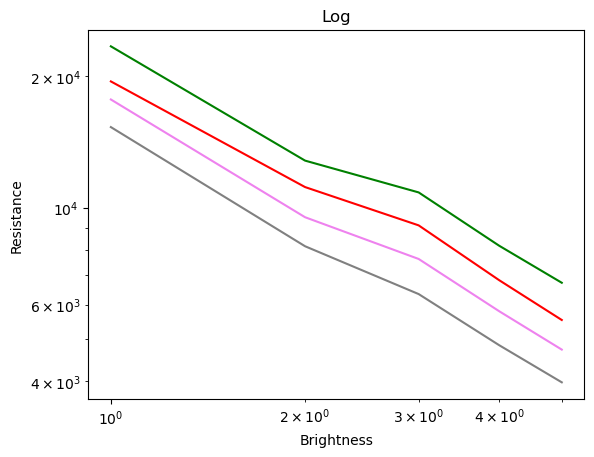

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Brightness': [1,2, 3, 4, 5],
    'R': [19.47, 11.15, 9.11, 6.82, 5.53],  
    'G': [23.43, 12.82, 10.84, 8.18, 6.73],  
    'V': [17.7, 9.51, 7.63, 5.79, 4.73],    #단위는 kohm
    'W': [15.3, 8.16, 6.34, 4.84, 3.98]     
}

for color in ['R', 'G', 'V', 'W']:
    data[color] = [x * 1000 for x in data[color]]

color_list = ['R','G','V','W']
plt.figure()
plt.title("Linear")
plt.plot(data['Brightness'],data['R'], color = 'red')
plt.plot(data['Brightness'],data['G'], color = 'green')
plt.plot(data['Brightness'],data['V'], color = 'violet')
plt.plot(data['Brightness'],data['W'], color = 'gray')
plt.xlabel("Brightness")
plt.ylabel("Resistance")
plt.show()

plt.figure()
plt.title("Log")
plt.plot(data['Brightness'],data['R'], color = 'red')
plt.plot(data['Brightness'],data['G'], color = 'green')
plt.plot(data['Brightness'],data['V'], color = 'violet')
plt.plot(data['Brightness'],data['W'], color = 'gray')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Brightness")
plt.ylabel("Resistance")
plt.show()


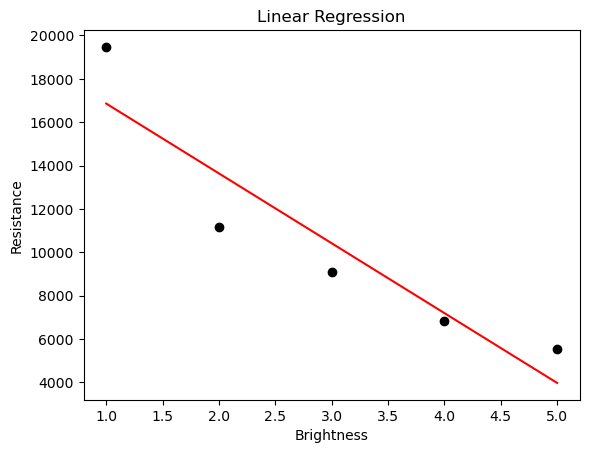

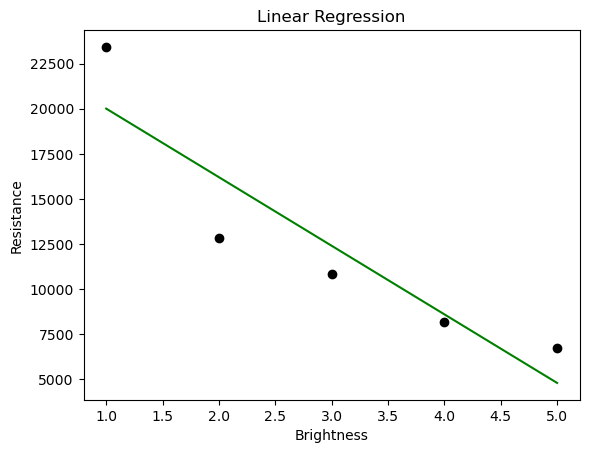

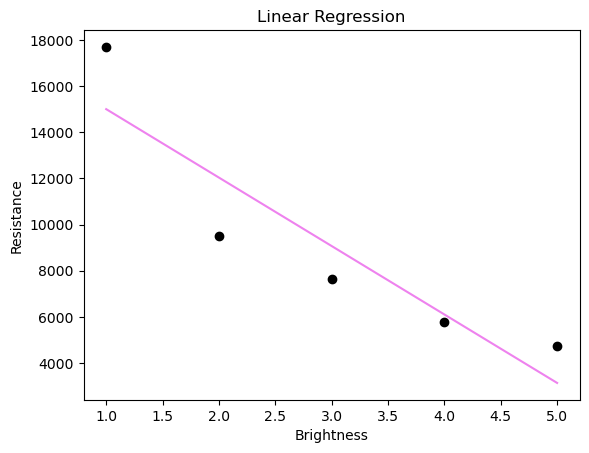

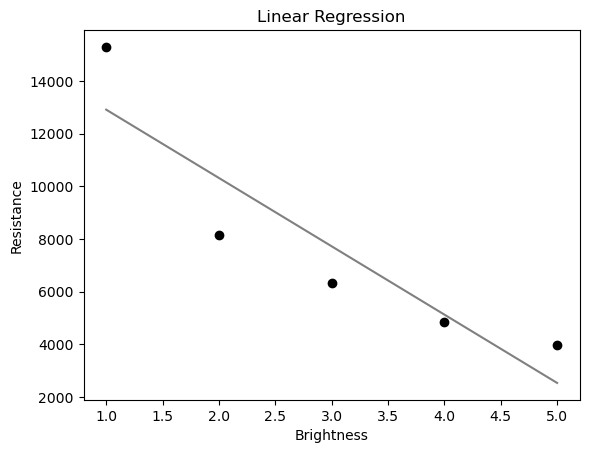

{'R': -3221.000000000001, 'G': -3804.000000000001, 'V': -2966.0, 'W': -2596.0000000000005}
[20079.000000000004, 23812.000000000004, 17970.0, 15512.000000000002]
0.16218565662837608 0.38621546103694504 0.2931387767773983 0.44576218565662823


In [31]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
linear_regressor = LinearRegression()
df = pd.DataFrame(data)
df.set_index('Brightness', inplace=True)

def linear_regression_and_plot(df, color, line_color):
    X = np.array(range(1, len(df) + 1)).reshape(-1, 1)  
    y = df[color].values.reshape(-1, 1) 
    linear_regressor.fit(X, y)
    sensitivity = linear_regressor.coef_[0][0]
    intercept = linear_regressor.intercept_[0]
    y_pred = linear_regressor.predict(X)
    plt.scatter(X, y, color='black')
    plt.plot(X, y_pred, color=line_color)
    plt.title(f'Linear Regression')
    plt.xlabel('Brightness')
    plt.ylabel('Resistance')
    return sensitivity, intercept
sensitivities = {}
intercept = [0,0,0,0]
sensitivities['R'], intercept[0] = linear_regression_and_plot(df, 'R','red')
plt.show()
sensitivities['G'], intercept[1] = linear_regression_and_plot(df, 'G','green')
plt.show()
sensitivities['V'], intercept[2] = linear_regression_and_plot(df, 'V','violet')
plt.show()
sensitivities['W'], intercept[3] = linear_regression_and_plot(df, 'W','gray')
plt.show()
max_r,max_g,max_v,max_w, =  0,0,0,0
for i in range(1,6):
    if max_r < abs(i-(data['R'][i-1]-intercept[0])/sensitivities['R']):
        max_r = abs(i-(data['R'][i-1]-intercept[0])/sensitivities['R'])
for i in range(1,6):
    if max_g < abs(i-(data['R'][i-1]-intercept[1])/sensitivities['R']):
        max_g = abs(i-(data['R'][i-1]-intercept[1])/sensitivities['R'])
for i in range(1,6):
    if max_v < abs(i-(data['R'][i-1]-intercept[2])/sensitivities['R']):
        max_v = abs(i-(data['R'][i-1]-intercept[2])/sensitivities['R'])
for i in range(1,6):
    if max_w < abs(i-(data['R'][i-1]-intercept[3])/sensitivities['R']):
        max_w = abs(i-(data['R'][i-1]-intercept[3])/sensitivities['R'])

    intercept[0]+sensitivities['R']*i
print(sensitivities)
print(intercept)
print(max_r/5,max_g/5,max_v/5,max_w/5)

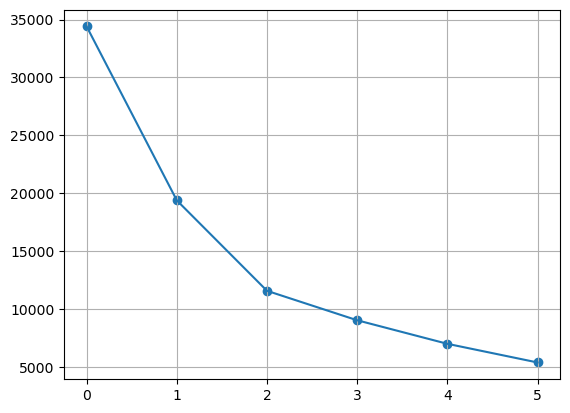

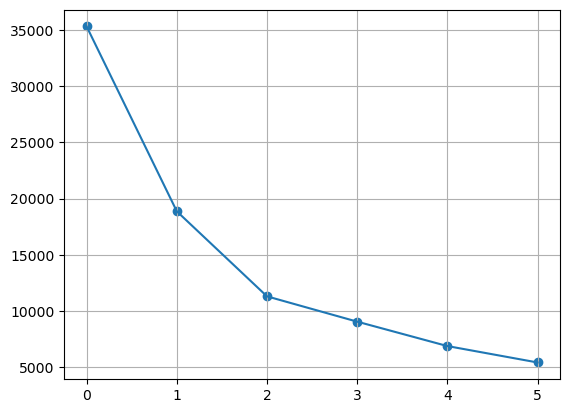

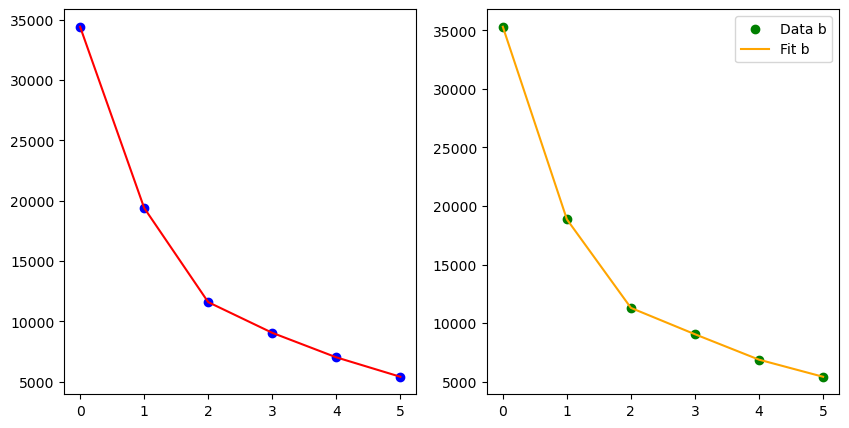

In [45]:
a=[34.4	,19.4,	11.6	,9.06	,7.03,	5.42]
b=[5.42,	6.88,	9.05,	11.3	,18.86	,35.3]
b.reverse()
t=[0,1,2,3,4,5]
for i in range(6):
    a[i]=a[i]*1000
    b[i]=b[i]*1000

plt.plot(a)
plt.scatter(t,a)
plt.grid()
plt.show()
plt.plot(b)
plt.scatter(t,b)
plt.grid()
plt.show()

# NumPy의 polyfit 함수를 사용하여 2차 회귀 계수를 계산
coefficients_a = np.polyfit(t, a, 5)
coefficients_b = np.polyfit(t, b, 5)

# 회귀식을 구성
poly_a = np.poly1d(coefficients_a)
poly_b = np.poly1d(coefficients_b)

# 그래프로 표시
plt.figure(figsize=(10, 5))


# a에 대한 데이터와 회귀선 표시
plt.subplot(1, 2, 1)
plt.scatter(t, a, color='blue', label='Data a')
plt.plot(t, poly_a(t), color='red', label='Fit a')

# b에 대한 데이터와 회귀선 표시
plt.subplot(1, 2, 2)
plt.scatter(t, b, color='green', label='Data b')
plt.plot(t, poly_b(t), color='orange', label='Fit b')

plt.legend()
plt.show()

In [63]:
from scipy.optimize import minimize_scalar
def f(x, coefficients):
    return coefficients[0]*x**5 +coefficients[1]*x**4 +coefficients[2]*x**3 + coefficients[3]*x**2 + coefficients[4]*x + coefficients[5]

def g(x, coefficients):
    return coefficients[0]*x**5 +coefficients[1]*x**4 +coefficients[2]*x**3 + coefficients[3]*x**2 + coefficients[4]*x + coefficients[5]
sampling = []
for i in range(5001):
    sampling.append(i/1000)
new_f = []
new_g = []
idx = []
max = 0
for i in sampling:
    new_f.append(f(i,coefficients_a))
    new_g.append(g(i,coefficients_b))
for i in range(len(new_f)):
    for j in range(len(new_g)):
        if new_f[i]>new_g[j]:
            break
    if max < abs(j-i):
        max = abs(j-i)
        idx.append([j,i,max])
print (idx)
max



[[45, 0, 45], [983, 1029, 46], [1001, 1048, 47], [1019, 1067, 48], [1038, 1087, 49], [1058, 1108, 50], [1077, 1128, 51], [1098, 1150, 52], [1118, 1171, 53], [1139, 1193, 54], [1161, 1216, 55], [1183, 1239, 56], [1206, 1263, 57], [1229, 1287, 58], [1253, 1312, 59], [1278, 1338, 60], [1303, 1364, 61], [1330, 1392, 62], [1357, 1420, 63], [1386, 1450, 64], [1416, 1481, 65], [1448, 1514, 66], [1482, 1549, 67], [1518, 1586, 68], [1557, 1626, 69], [1602, 1672, 70], [1653, 1724, 71], [1719, 1791, 72], [4196, 4269, 73], [4209, 4283, 74], [4221, 4296, 75], [4233, 4309, 76], [4244, 4321, 77], [4256, 4334, 78], [4267, 4346, 79], [4278, 4358, 80], [4289, 4370, 81], [4300, 4382, 82], [4310, 4393, 83], [4320, 4404, 84], [4330, 4415, 85], [4340, 4426, 86], [4350, 4437, 87], [4359, 4447, 88], [4368, 4457, 89], [4377, 4467, 90], [4385, 4476, 91], [4394, 4486, 92], [4402, 4495, 93], [4410, 4504, 94], [4417, 4512, 95], [4425, 4521, 96], [4432, 4529, 97], [4439, 4537, 98], [4446, 4545, 99], [4452, 4552, 10

406

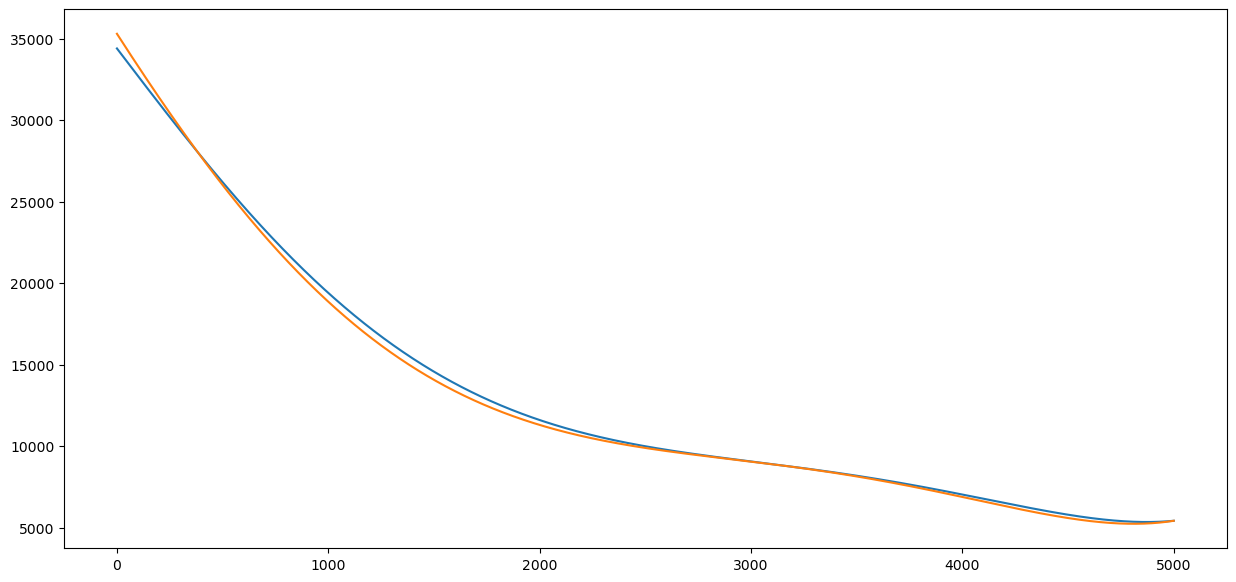

In [64]:
plt.figure(figsize=(15,7))
plt.plot(new_f)
plt.plot(new_g)

In [68]:
green_list1 = [35.49,	23.59,	13.83,	10.93,	8.48,	6.74]
green_list2 = [34.72,	22.53,	13.42,	10.98,	8.57,	6.72]
green_list3 = [35.21,	23.33,	13.27,	10.25,	8.43,	6.45]
green_list4 = [36.22,	23.68,	13.48,	11.28,	8.36,	6.65]
green_list5 = [35.60,	24.13,	13.93,	10.66,	8.49,	6.53]

Text(0, 0.5, 'Resistance [kΩ]')

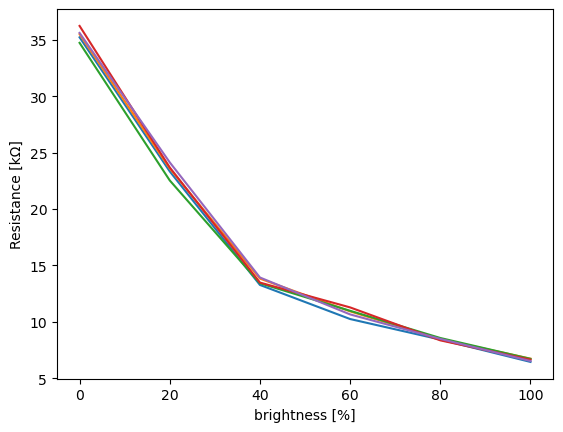

In [77]:
brightness= [0, 20, 40, 60, 80, 100]

plt.plot(brightness,green_list3)
plt.plot(brightness,green_list1)
plt.plot(brightness,green_list2)
plt.plot(brightness,green_list4)
plt.plot(brightness,green_list5)

plt.xlabel('brightness [%]')
plt.ylabel('Resistance [kΩ]')

In [78]:
coefficients_green = np.polyfit(brightness, green_list3, 1)

In [79]:
coefficients_green

array([-0.2736    , 29.83666667])

In [81]:
3.8/25

0.152